# **The Solar Cycle**
The solar magnetic activity cycle, sunspot cycle, Schwabe cycle, or simple the **solar cycle**, refers to the periodic changes in the Sun's activity and appearance, notably observed in the number of sunspots, over roughly 11 years. The magnetic field of the Sun flips during each solar cycle, with the flip occurring when the solar cycle is near its maximum. After two solar cycles, the Sun's magnetic field returns to its original state, completing what is known as a Hale cycle [1].

> **Understanding and predicting the solar cycle remains one of the grand challenges in astrophysics with major ramifications for space science and the understanding of magnetohydrodynamic phenomena elsewhere in the universe [1].**

Here's a brief breakdown of solar cycle's key aspects:

- **Sunspots and Magnetic Activity:**
Sunspots are temporary dark spots on the Sun's surface caused by magnetic activity. The number of sunspots increases and decreases during the solar cycle, reaching a peak known as the "solar maximum," where solar activity, including flares and coronal mass ejections, is most intense. The "solar minimum" is the period with the fewest sunspots and lower solar activity.

- **Solar Magnetic Field Reversal:**
Around the solar maximum, the Sun’s magnetic field begins to flip, a process that completes every 11 years on average. After the flip, a new cycle begins.

- **Impacts on Earth:**
Solar cycles significantly affect space weather, which can disrupt satellite communications, navigation systems, and even power grids on Earth. Increased solar activity can also enhance auroras (Northern and Southern Lights) near polar regions, due to charged particles interacting with Earth's magnetic field.

- **Solar Cycle Phases:**
The cycle has four main phases:
    1. Minimum: Low sunspot activity; the start of a new cycle.
    2. Ascending: Gradual increase in sunspot activity.
    3. Maximum: Peak sunspot and solar activity, with higher levels of solar radiation and more frequent solar storms.
    4. Descending: Decline in sunspot numbers and overall solar activity.

- **Current Cycle:**
We are currently in Solar Cycle 25, which began in December 2019. Scientists study solar cycles to predict space weather and its potential impacts on technology and human activity on Earth.

In the following sections, we perform preliminary exploration of the available datasets from Ref. [2]. Specifically, we want to recreate the figure below:
![sunspot number vs time plot](https://www.sidc.be/SILSO/IMAGES/GRAPHICS/wolfjmms.png)

References:

[1] https://en.wikipedia.org/wiki/Solar_cycle

[2] https://www.sidc.be/SILSO/home

-------------------------------------------------------------------------------
### **1. Daily total sunspot number**
-------------------------------------------------------------------------------

*Directly lifted from (https://sidc.be/SILSO/infosndtot). Although, some parts are not included in this documentation.*

Time range: 1/1/1818 - last elapsed month (provisional values)

**Data description:**
Daily total sunspot number derived by the formula: R= Ns + 10 * Ng, with Ns the number of spots and Ng the number of groups counted over the entire solar disk.

No daily data are provided before 1818 because daily observations become too sparse in earlier years. Therefore, R. Wolf only compiled monthly means and yearly means for all years before 1818.

In the TXT and CSV files, the missing values are marked by -1 (valid Sunspot Number are always positive).

**TXT**

Filename: SN_d_tot_V2.0.txt
Format: plain ASCII text

Contents:
- Column 1-3: Gregorian calendar date (Year, Month, Day)
- Column 4: Date in fraction of year
- Column 5: Daily total sunspot number. A value of -1 indicates that no number is available for that day (missing value).
- Column 6: Daily standard deviation of the input sunspot numbers from individual stations.
- Column 7: Number of observations used to compute the daily value.
- Column 8: Definitive/provisional indicator. A blank indicates that the value is definitive. A '*' symbol indicates that the value is still provisional and is subject to a possible revision (Usually the last 3 to 6 months)

**CSV**

Filename: SN_d_tot_V2.0.csv
Format: Comma Separated values (adapted for import in spreadsheets)
The separator is the semicolon ';'.

Contents:
- Column 1-3: Gregorian calendar date (Year, Month, Day)
- Column 4: Date in fraction of year.
- Column 5: Daily total sunspot number. A value of -1 indicates that no number is available for that day (missing value).
- Column 6: Daily standard deviation of the input sunspot numbers from individual stations.
- Column 7: Number of observations used to compute the daily value.
- Column 8: Definitive/provisional indicator. '1' indicates that the value is definitive. '0' indicates that the value is still provisional.

**LICENSE**

SILSO data is under CC BY-NC4.0 license (https://goo.gl/PXrLYd) which means you can :

Share — copy and redistribute the material in any medium or format
Adapt — remix, transform, and build upon the material

As long as you follow the license terms:

Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
NonCommercial — You may not use the material for commercial purposes.
No additional restrictions — You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits.

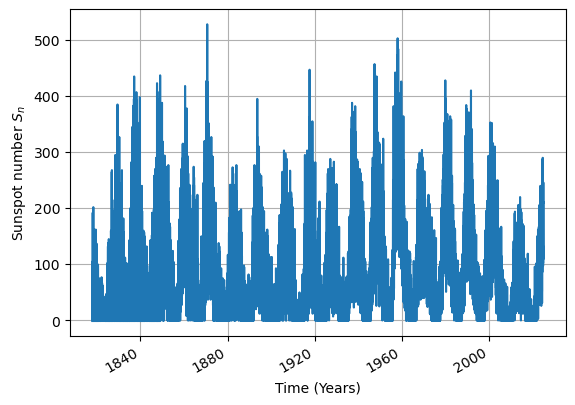

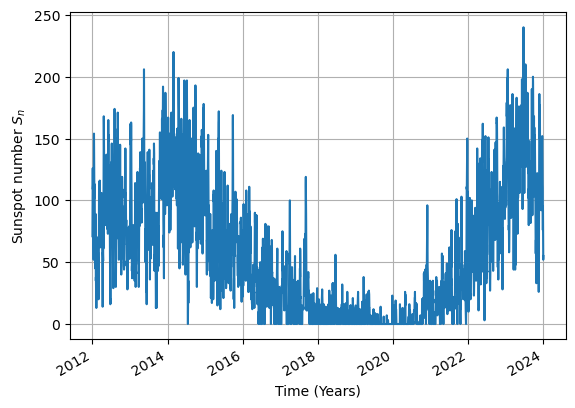

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime

filename = 'datasets\SN_d_tot_V2.0.txt'

# Initialize lists for each column
data = [[] for _ in range(7)]  # Create a list of 8 empty lists, one for each column

# Load data from the text file
with open(filename, 'r') as file:
    for line in file:
        columns = line.split()
        for i in range(7):
            data[i].append(float(columns[i]))  # Convert each column to float and store in the corresponding list

# Select columns to plot (for example, date and sunspot number)
x_data = [datetime(int(year), int(month), int(day)) for year, month, day in zip(data[0], data[1], data[2])]
y_data = data[4]

# Define your start and end dates
start_date = datetime(2012, 1, 1)
end_date = datetime(2024, 1, 1)

# Filter the data based on the specified date range
filtered_x_data = [x for x in x_data if start_date <= x <= end_date]
filtered_y_data = [y for x, y in zip(x_data, y_data) if start_date <= x <= end_date]

# Plotting the whole dataset
plt.plot(x_data, y_data)
plt.xlabel('Time (Years)')
plt.ylabel('Sunspot number $S_n$')
plt.gcf().autofmt_xdate()  # Rotate date labels for readability
plt.grid(True)
plt.show()

# Plotting the dataset with specific range of date
plt.plot(filtered_x_data, filtered_y_data)
plt.xlabel('Time (Years)')
plt.ylabel('Sunspot number $S_n$')
plt.gcf().autofmt_xdate()  # Rotate date labels for readability
plt.grid(True)
plt.show()